# MDI220
# Statistiques

# Mini-project 

Ce mini-projet est pour le cours Statistiques MDI220.

Vous devez remplir ce notebook et le uploader sur eCampus, **avec les figures**. S'il vous plaît, assurez-vous que le notebook s'execute **sans erreurs**.

Vous pouvez accomplir ce projet en français ou en anglais (votre préférence).

Vous pouvez travailler en equipe, mais le notebook final, compris le texte et le code, doit être **votre propre**. Plagiat entre les étudiants est strictement interdit.

S'il vous plaît, donner **la réponse concise** et **le code concis**, avec des commentaires ou approprié.

(Re)nommer le fichier de ce notebook dans le format suivant : "NOM_Prenom_projet_MDI220.ipynb".

## Guez Eliot


## Imports

S'il vous plaît, **n'importez pas** d'autres librairies.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
from scipy.stats import norm, chi2, gaussian_kde
from scipy.stats import t,ttest_1samp


In [42]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023. Les données sont accessibles sur **eCampus**.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [43]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [44]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [45]:
regions = list(df.region.unique())

In [46]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [47]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [48]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [49]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

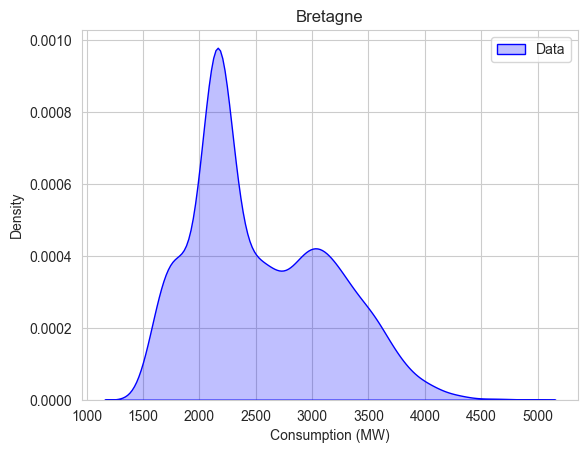

In [50]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne. 

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

On va essayer de montrer que l'espèrance de l'estimateur moins ce qu'on souhaite estimé est nulle. Cela s'écrit ainsi:  

\begin{align*}



\mathbb{E}(\hat{\mu} -\mu ) &= \mathbb{E}\left(\frac{1}{n}\sum_{i=1}^n x_i -\mu \right) \\

&= \frac{1}{n}\sum_{i=1}^n \mathbb{E}(x_i) -\mathbb{E}(\mu) \\
&=\frac{1}{n}\sum_{i=1}^n \mathbb{E}(x_i) -\mu \\
&=\frac{1}{n}\sum_{i=1}^n\mu  -\mu \\
&= 0\\
\end{align*}

\begin{align*}
\mathbb{E}(\hat{\sigma^2}-\sigma^2) &= \mathbb{E}(\frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2 -\sigma^2) \\
&= \frac 1 {n-1} \sum_{i=1}^n \mathbb{E}((x_i - \hat\mu)^2) - \mathbb{E}(\sigma^2) \\
&= \frac n {n-1} \mathbb{E}((x_1 - \hat\mu)^2) - \mathbb{E}(\sigma^2) \\
&= \frac n {n-1} ( \mathbb{E}(x_1^2) + \mathbb{E}((\hat\mu)^2) - 2 \mathbb{E}(\hat\mu x_1) )\\
&= \frac n {n-1} ( \mathbb{E}(x_1^2) + \mathbb{E}((\frac 1 n \sum_{i=1}^n x_i)^2) - 2 \mathbb{E}(\frac 1 n \sum_{i=1}^n x_i x_1) ) - \mathbb{E}(\sigma^2) \\
&= \frac n {n-1} ( \mathbb{E}(x_1^2) +\frac 1 {n^2} \mathbb{E}((\sum_{i=1}^n x_i)^2) - \frac 2 n \mathbb{E}(\sum_{i=1}^n x_i x_1) ) - \mathbb{E}(\sigma^2) \\
&= \frac n {n-1} ( \mathbb{E}(x_1^2) +\frac 1 {n^2} (\sum_{i=1}^n \mathbb{E}(x_i^2)+ \sum_{i,j} \mathbb{E}(x_i) \mathbb{E} (x_j)) - \frac 2 n \sum_{i=1}^n \mathbb{E}(x_i)\mathbb{E}( x_1)) - \mathbb{E}(\sigma^2) \\
&= \frac n {n-1} ( \mathbb{E}(x_1^2)+\frac 1 n \mathbb{E}(x_1^2)+ \frac {n^2-n} {n^2} \mu^2 -2 \mu^2) - \mathbb{E}(\sigma^2)  \\
&= \frac n {n-1} (\frac {n+1} n \mathbb{E}(x_1^2)- \frac {n+1} n \mu^2)- \mathbb{E}(\sigma^2) \\
&= \frac {n+1} {n-1} (\mathbb{E}(x_1^2)- \mu^2) - \mathbb{E}(\sigma^2)  \\
&= \frac {n+1} {n-1} (\mathbb{E}(x_1^2)- \mathbb{E}(x_1)^2) - \mathbb{E}(\sigma^2) \\
&=0 \\



\end{align*}

2. Donnez les valeurs obtenues pour la moyen et pour la variance en utilisant ces estimateurs.

In [51]:
def moyenne(df):
    return df.consumption.sum()/ df.consumption.count()
def stdDev(df):
    somme_carres_ecarts= sum((x - moyenne(df)) ** 2 for x in df['consumption'])
    std=np.sqrt(somme_carres_ecarts/(df.consumption.count()-1))
    return std


mû = moyenne(df_region)
std=stdDev(df_region)


print(mû, df_region.consumption.mean())
print(std**2, df_region.consumption.std()**2)

2546.536155666579 2546.536155666579
365956.0141448162 365956.0141448175


3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

In [52]:
nouvelles_donnees = [np.random.normal(mû, std) for _ in range(df_region.consumption.count())]

# Créez un nouveau DataFrame avec les nouvelles données
gaussien_df = pd.DataFrame({'consumption': nouvelles_donnees})
gaussien_df.head()

,consumption
0,2914.626215
1,2579.780062
2,2835.632233
3,2278.859026
4,2177.834724


4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

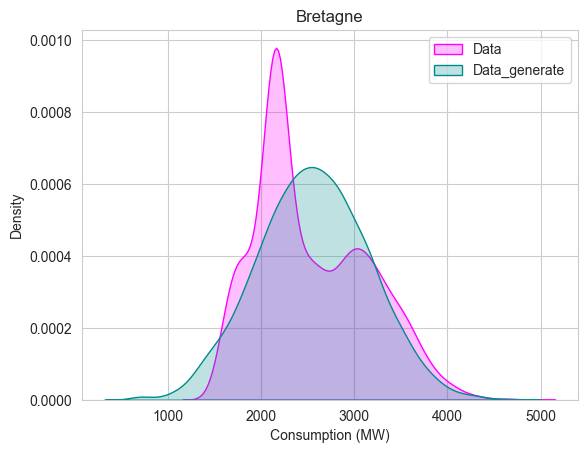

In [53]:
sns.kdeplot(data=df_region, x="consumption", label="Data", color='magenta', fill=True)
sns.kdeplot(data=gaussien_df, x="consumption", label="Data_generate", color='darkcyan', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 

5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

In [54]:
df_region['date']=pd.to_datetime(df_region['date'])

jours_hivers = pd.DataFrame()

for annee in range(2013, 2024):
    date_debut = pd.to_datetime(f'{annee-1}-12-22')
    date_fin = pd.to_datetime(f'{annee}-03-21')
    hivers=pd.DataFrame(df_region[(df_region['date'] >= date_debut) & (df_region['date'] <= date_fin)])
    jours_hivers = pd.concat([jours_hivers, hivers])

C:\Users\eliot\AppData\Local\Temp\ipykernel_2148\3929042463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date']=pd.to_datetime(df_region['date'])


In [55]:
mûh=moyenne(jours_hivers)
stdh =stdDev(jours_hivers)
print(mûh,jours_hivers.consumption.mean())
print(stdh**2,jours_hivers.consumption.std()**2)

3214.1782077393077 3214.1782077393077
167670.9009313411 167670.9009313411


In [56]:
donnees_hiver = [np.random.normal(mûh, stdh) for _ in range(jours_hivers.consumption.count())]

# Créez un nouveau DataFrame avec les nouvelles données
gaussienh_df = pd.DataFrame({'consumption': donnees_hiver})
gaussienh_df.head()

,consumption
0,2745.576889
1,3356.166522
2,2970.932393
3,2542.111571
4,3392.037826


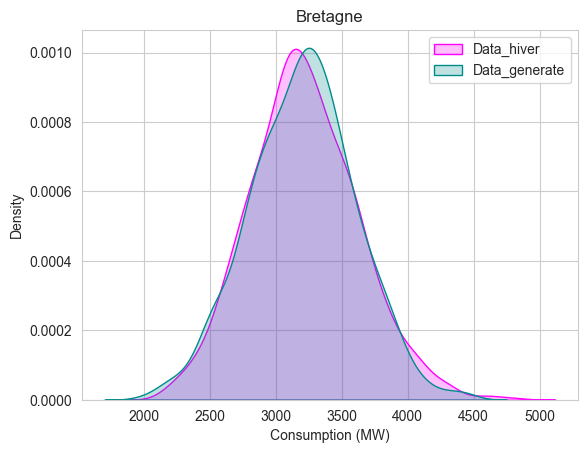

In [57]:
sns.kdeplot(data=jours_hivers, x="consumption", label="Data_hiver", color='magenta', fill=True)
sns.kdeplot(data=gaussienh_df, x="consumption", label="Data_generate", color='darkcyan', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 

6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

D'après le graphique l'hypothèse gaussienne est bien plus appropriée dans le cas où on regarde les jours d'hivers

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctionnes de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

Si $d(f,g)=0 \quad  \text{alors} \quad \forall x \in \mathbb{R}$ *(ou plutôt presque partout)* on a $f(x)=g(x) \quad \text{car} \;  |f(x)-g(x)|\geq0$ d'où $f=g\\$  
La réciproque est triviale

Maintenant  

\begin{align*}
d(f,g) = 1 \Leftrightarrow \int |f(x) - g(x)| \mathrm dx= 2 \\
\int |f(x) - g(x)| \mathrm dx &\leq \int |f(x)|  \mathrm dx + \int |g(x)|  \mathrm dx \quad \text{ avec égalité si et seulement si f et g sont à supports disjoints}\\
\int |f(x) - g(x)|\mathrm dx  &\leq2\\
\end{align*}
Donc $d(f,g) = 1\Rightarrow \quad \text{f, g sont à supports disjoints} \\$  

La réciproque est évidente également

2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

In [58]:
kde_bretagne= gaussian_kde(df_region.consumption)
pdf_gaussien= norm(mû,std).pdf

def dissimilarite(f,g):
    x=np.linspace(0, 2*df_region.consumption.max(), 5000)
    return 1/2* np.trapz(np.abs(f(x)-g(x)),x)
dissimilarite(kde_bretagne,pdf_gaussien)


0.17913071715736903

3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

In [59]:
kde_bretagne_hiver= gaussian_kde(jours_hivers.consumption)
pdf_gaussien_hiver= norm(mûh,stdh).pdf
dissimilarite(kde_bretagne_hiver,pdf_gaussien_hiver)

0.03093884081833875

On remarque que la dissimilarité est beaucoup plus faible ce qui confirme les résultats de la partie 1

4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

In [60]:
def equivalentHiver(df):
    df['date']=pd.to_datetime(df['date'])
    HiverSeul = pd.DataFrame()
    for annee in range(2013, 2024):
        date_debut = pd.to_datetime(f'{annee-1}-12-22')
        date_fin = pd.to_datetime(f'{annee}-03-21')
        Hivers=pd.DataFrame(df[(df['date'] >= date_debut) & (df['date'] <= date_fin)])
        HiverSeul = pd.concat([HiverSeul, Hivers])
    return HiverSeul

In [61]:
Results= []


for region in df.region.unique():
    #pour chaque région
    df_region = df[df.region == region]
    kde_region= gaussian_kde(df_region.consumption)
    pdf_gaussien_region= norm(moyenne(df_region),stdDev(df_region)).pdf
    Results.append([region, dissimilarite(kde_region,pdf_gaussien_region)])
    #pour leur version d'hivers
    df_region_hiver = equivalentHiver(df_region)
    kde_region_hiver=gaussian_kde(df_region_hiver.consumption)
    pdf_gaussien_region_hiver= norm(moyenne(df_region_hiver),stdDev(df_region_hiver)).pdf
    Results.append([region+' HIVER', dissimilarite(kde_region_hiver,pdf_gaussien_region_hiver)])
    
Results=pd.DataFrame(Results, columns=['Region','Dissimilarite'])
Results


C:\Users\eliot\AppData\Local\Temp\ipykernel_2148\3963242905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])


C:\Users\eliot\AppData\Local\Temp\ipykernel_2148\3963242905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])
C:\Users\eliot\AppData\Local\Temp\ipykernel_2148\3963242905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])
C:\Users\eliot\AppData\Local\Temp\ipykernel_2148\3963242905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,Region,Dissimilarite
0,Auvergne-Rhône-Alpes,0.168471
1,Auvergne-Rhône-Alpes HIVER,0.037379
2,Bourgogne-Franche-Comté,0.124552
3,Bourgogne-Franche-Comté HIVER,0.037436
4,Bretagne,0.179131
5,Bretagne HIVER,0.030939
6,Centre-Val de Loire,0.194057
7,Centre-Val de Loire HIVER,0.043146
8,Grand Est,0.115045
9,Grand Est HIVER,0.039064


5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

In [62]:
Results.sort_values(by='Dissimilarite', ascending=True)

,Region,Dissimilarite
11,Hauts-de-France HIVER,0.027518
5,Bretagne HIVER,0.030939
21,Provence-Alpes-Côte d'Azur HIVER,0.034813
1,Auvergne-Rhône-Alpes HIVER,0.037379
3,Bourgogne-Franche-Comté HIVER,0.037436
9,Grand Est HIVER,0.039064
19,Pays de la Loire HIVER,0.039189
13,Normandie HIVER,0.042745
7,Centre-Val de Loire HIVER,0.043146
23,Île-de-France HIVER,0.052405


Le modèle qui fit le mieux avec le modèle gaussien en hiver est celui des Hauts-de-France.

6. Pour ces région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

C:\Users\eliot\AppData\Local\Temp\ipykernel_2148\3963242905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])


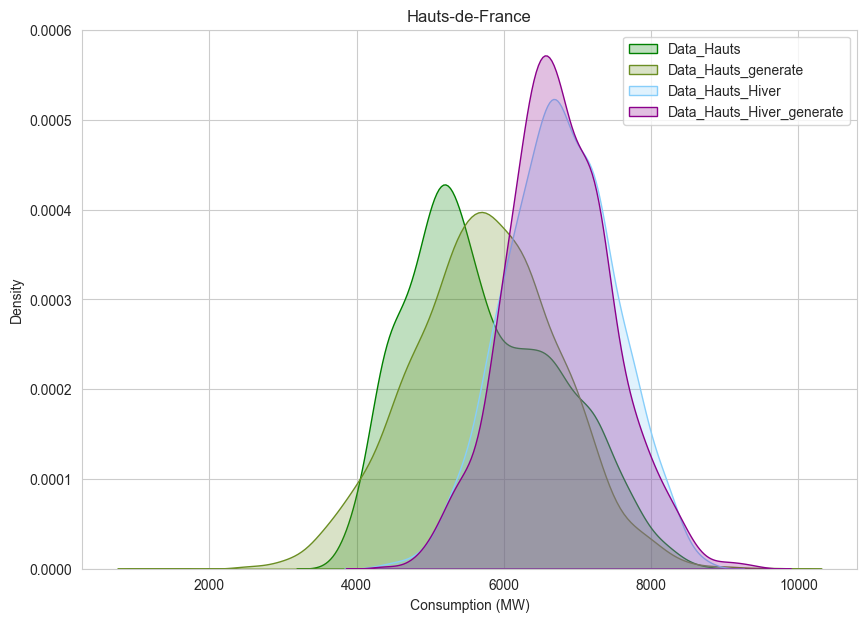

In [63]:
df_Hauts = df[df.region == "Hauts-de-France"]

mûH=moyenne(df_Hauts)
stdH =stdDev(df_Hauts)
df_Hauts_generate = [np.random.normal(mûH, stdH) for _ in range(df_Hauts.consumption.count())]
df_Hauts_generate= pd.DataFrame({'consumption':df_Hauts_generate})

df_Hauts_hiver = equivalentHiver(df_Hauts)
mûHh=moyenne(df_Hauts_hiver)
stdHh =stdDev(df_Hauts_hiver)

df_Hauts_hiver_generate = [np.random.normal(mûHh, stdHh) for _ in range(df_Hauts_hiver.consumption.count())]
df_Hauts_hiver_generate= pd.DataFrame({'consumption':df_Hauts_hiver_generate})

plt.figure(figsize=(10, 7))
sns.kdeplot(data=df_Hauts, x="consumption", label="Data_Hauts", color='green', fill=True)
sns.kdeplot(data=df_Hauts_generate, x="consumption", label="Data_Hauts_generate", color='olivedrab', fill=True)
sns.kdeplot(data=df_Hauts_hiver, x="consumption", label="Data_Hauts_Hiver", color='lightskyblue', fill=True)
sns.kdeplot(data=df_Hauts_hiver_generate, x="consumption", label="Data_Hauts_Hiver_generate", color='darkmagenta', fill=True)
plt.title("Hauts-de-France")
plt.xlabel("Consumption (MW)")
plt.legend() 

## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma=400$ MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0=3500$ MW et l'écart-type $\sigma_0=500$ MW.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

Loi a priori sur $\mu \sim \mathcal{N}(\mu_0, \sigma_0^2)$

Pour déterminer la loi a posteriori, on utilise la formule de distribution a posteriori:  $\pi(\mu|X=x) \; \propto \; {\pi(\mu)} p_{\mu}(x)$  
On a $p_\mu(X)= \prod _{i=1}^n \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}} = \frac 1 {\sigma^n (2\pi)^{n/2}} e^{\frac {-\sum _{i=1}^n (x_i-\mu)^2}{2\sigma^2}}\\$  

Donc  
$$\pi(\mu|X) \; \propto \; \frac{1}{\sigma_0 \sqrt{2\pi}} e^{-\frac{(x_i - \mu_0)^2}{2\sigma_0^2}}\frac 1 {\sigma^n (2\pi)^{n/2}} e^{\frac {-\sum _{i=1}^n (x_i-\mu)^2}{2\sigma^2}}\\$$
$$\pi(\mu|X) \; \propto \;  e^{-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}} e^{\frac {-\sum _{i=1}^n (x_i-\mu)^2}{2\sigma^2}}\\$$
$$\pi(\mu|X) \; \propto \;  e^{-\frac{(\mu^2 -2\mu\mu_0)}{2\sigma_0^2}} e^{\frac {-\sum _{i=1}^n -2x_i\mu+\mu^2}{2\sigma^2}}\\$$
$$\pi(\mu|X) \; \propto \;  e^{\frac{\sigma^2(2\mu\mu_0-\mu^2)}{2\sigma_0^2\sigma^2}}e^{\frac {\sigma_0^2(2\mu\sum _{i=1}^n x_i-n\mu^2)}{2\sigma^2\sigma_0^2}}\\$$
$$\pi(\mu|X) \; \propto \;  e^{\frac{\sigma^2(2\mu\mu_0-\mu^2)+\sigma_0^2(2\mu\sum _{i=1}^n x_i-n\mu^2)}{2\sigma_0^2\sigma^2}}\\$$
$$\pi(\mu|X) \; \propto \;  e^{\frac{-(\sigma^2+n\sigma_0^2)\mu^2 +2\mu(\sigma^2\mu_0+\sigma_0^2 \sum _{i=1}^n x_i)}{2\sigma_0^2\sigma^2}}\\$$
$$\pi(\mu|X) \; \propto \;  e^{\frac{-\mu^2 +2\mu\frac {(\sigma^2\mu_0+\sigma_0^2 \sum _{i=1}^n x_i)}{(\sigma^2+n\sigma_0^2)}}{\frac {2\sigma_0^2\sigma^2}{ (\sigma^2+n\sigma_0^2)}}}\\$$

On reconnait $\mu | X  \propto \mathcal{N}(\frac{\mu_0 \sigma^2 + \sigma_0^2\sum_{i} x_i}{n\sigma_0^2 + \sigma^2}, \frac{\sigma_0^2 \sigma^2}{n\sigma_0^2 +\sigma^2}) $

2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

In [64]:
df_region= df[df.region == "Bretagne"]
df_region['date']=pd.to_datetime(df_region['date'])
mu0 = 3500
sigma0 = 500
sigma= 400
Results=[]

for annee in range(2013, 2024):
    date_debut = pd.to_datetime(f'{annee-1}-12-22')
    date_fin = pd.to_datetime(f'{annee}-03-21')
    hivers=pd.DataFrame(df_region[(df_region['date'] >= date_debut) & (df_region['date'] <= date_fin)])
    sigma=stdDev(hivers)
    Results.append([annee, (mu0*sigma**2+sigma0**2*hivers.consumption.sum())/ (hivers.consumption.count()*sigma0**2+sigma**2), (sigma0*sigma)**2/((hivers.consumption.count()*sigma0**2+sigma**2))])

Results=pd.DataFrame(Results, columns=['Annee','mu','sigma'])
Results

C:\Users\eliot\AppData\Local\Temp\ipykernel_2148\1387064768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date']=pd.to_datetime(df_region['date'])


,Annee,mu,sigma
0,2013,3395.062618,1715.647685
1,2014,3094.154259,1164.150299
2,2015,3229.133109,1356.327990
3,2016,3133.339590,1459.259565
4,2017,3276.454463,2471.723005
5,2018,3328.872104,2020.501838
6,2019,3179.823713,1681.553041
7,2020,3123.168917,1156.507893
8,2021,3361.076829,2512.164789
9,2022,3215.945253,1681.101453


3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

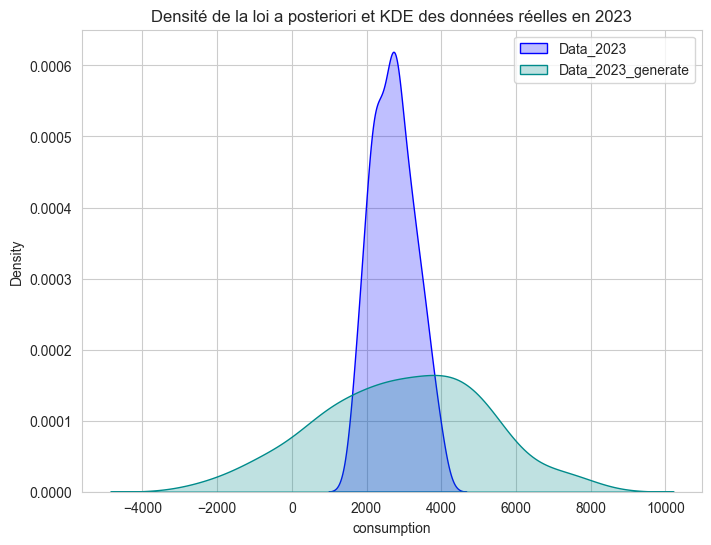

In [65]:
data_2023=df_region[df_region['date'].dt.year == 2023]
data_2023_generate = pd.DataFrame([np.random.normal(Results.mu[10], Results.sigma[10]) for _ in range(data_2023.consumption.count())],columns=['consumption'])

# Tracer la densité de la loi a posteriori et le KDE des données réelles sur le même graphique
x = np.linspace(Results.mu[10] - 4 * sigma, Results.mu[10] + 4 * sigma, 1000)
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.kdeplot(data=data_2023, x="consumption", label="Data_2023", color='blue', fill=True)
sns.kdeplot(data=data_2023_generate, x="consumption", label="Data_2023_generate", color='darkcyan', fill=True)
plt.title("Densité de la loi a posteriori et KDE des données réelles en 2023")
plt.legend()
plt.show()


4. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

Le modèle n'est pas très bon puisque les résultats sont bien moins bon que la partie précédente.

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous souhaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.

On souhaite tester l'hypothèse $H_0 : \sigma = 500 $ MW en 2023 contre l'hypothèse $H_1 : \sigma \neq 500 $  
Sous cette hypothèse on a : $\chi^2(n-1) \sim \frac {(n-1 )S^2} {\sigma^2} $  

Pour la statistique de test $T = \frac {(n-1 )S^2} {\sigma^2}$ : on a la région d'acceptation $A=[\chi^2_{\frac {\alpha} 2}(n-1),\chi^2_{1- \frac {\alpha} 2 }(n-1)]$




2. Donnez le résultat de ce test pour $\alpha=1\%$.

In [66]:
alpha=0.01
sigma0=500
data_region_2023=df_region[df_region['date'].dt.year == 2023]
data_region_2023['date']=pd.to_datetime(data_region_2023['date'])
data_region_hiver_2023=pd.DataFrame(data_region_2023[data_region_2023['date'] <= pd.to_datetime('2023-03-21')])

Amin=chi2.ppf(alpha/2, df=data_region_hiver_2023.consumption.count()-1)
Amax=chi2.ppf(1-alpha/2, df=data_region_hiver_2023.consumption.count()-1)

std= stdDev(data_region_hiver_2023)

print (Amax, Amin)
print (((data_region_hiver_2023.consumption.count()-1)*std**2)/sigma0**2)

if Amin<= ((data_region_hiver_2023.consumption.count()-1)*std**2)/sigma0**2 <= Amax:
    print("Ho est acceptée")
else:
    print("Ho est rejetée")

115.1166146892916 50.37611608763056
56.060287949999996
Ho est acceptée


C:\Users\eliot\AppData\Local\Temp\ipykernel_2148\293234838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_region_2023['date']=pd.to_datetime(data_region_2023['date'])


On souhaite tester l'hypothèse $H_0 : \sigma_0 = 500 $ MW en 2023 contre l'hypothèse $H_1 : \sigma_1 = 400 $
On effectue le test de rapport de vraisemblance de Neyman-Person


$f(x,\sigma_1) =  \frac 1 {(2\sigma_1^2\pi)^{n/2}} e^{ \frac {-1} 2 \frac {\sum _{k=1}^n(x_k- \mu_0)^2}{\sigma_1^2}} \\$
$f(x,\sigma_0) =  \frac 1 {(2\sigma_0^2\pi)^{n/2}} e^{ \frac {-1} 2 \frac {\sum _{k=1}^n(x_k- \mu_0)^2}{\sigma_0^2}} \\$
On sait que la somme de N lois normales de paramètres $ \mu_1, \ldots ,\mu_n \quad \text{et} \quad \sigma_1^2, \ldots ,\sigma_n^2 $ a pour moyenne et variance : $ \sum \mu_k \; , \; \sum \sigma_k^2 \\$


Le rapport des deux fonctions   est donc :  

\begin{align*}

Z(x_1, \ldots , x_n)= \frac {f(x,\sigma_1)} {f(x,\sigma_0)} &= \frac{\sigma_0^n}{\sigma_1^n}  e^{ \frac {-1} 2 (  \frac {\sum _{k=1}^n (x_k - \mu_0)^2}{n\sigma_1^2} - \frac {\sum _{k=1}^n (x_k- \mu_0)^2}{n\sigma_0^2}  )}\\
&=\frac{\sigma_0^n}{\sigma_1^n}  e^{ -\frac {\sum _{k=1}^n (x_k - \mu_0)^2} {2n}   (\frac1 {\sigma_1^2}- \frac 1 {\sigma_0^2}) }  \\

\end{align*}

L'événement $Z(x_1, \ldots , x_n) > c$  est équivalent à $\sum _{k=1}^n (x_k-\mu_0)^2< d$ pour un d choisi convenablement
$$
P_{\sigma_0}(\sum _{i=1} ^n (x_i-\mu_0)^2 \leq d)= \alpha  
$$
$$
P_{\sigma_0}(\frac {\sum _{i=1} ^n (x_i-\mu_0)^2} {\sigma_0^2} \leq \frac d {\sigma_0^2})= \alpha  
$$

Comme $ \sum _{i=1} ^n \frac {x_i^2}{\sigma_0^2}$ est distribué selon une loi de $\chi^2$ centré à n degré de liberté, on peut déterminer d à partir des quantiles de cette loi.


In [67]:
alpha=0.01
quantile=chi2.ppf(alpha, df=data_region_hiver_2023.consumption.count())
sigma0=500
mu0=3200
d=quantile*sigma0**2

if (sum((x - mu0) ** 2 for x in data_region_hiver_2023['consumption'])<= d):
    print("Ho est rejetée")
else:
    print("Ho est acceptée")


print(sum((x - mu0) ** 2 for x in data_region_hiver_2023['consumption'])/sigma0**2)
print(quantile)
print(data_region_hiver_2023)


Ho est acceptée
58.400252
53.54007729107874
         region       date  consumption
11258  Bretagne 2023-01-01         2306
11259  Bretagne 2023-01-02         2702
11260  Bretagne 2023-01-03         3049
11261  Bretagne 2023-01-04         2904
11262  Bretagne 2023-01-05         2833
...         ...        ...          ...
11333  Bretagne 2023-03-17         2609
11334  Bretagne 2023-03-18         2309
11335  Bretagne 2023-03-19         2206
11336  Bretagne 2023-03-20         2672
11337  Bretagne 2023-03-21         2618

[80 rows x 3 columns]


## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

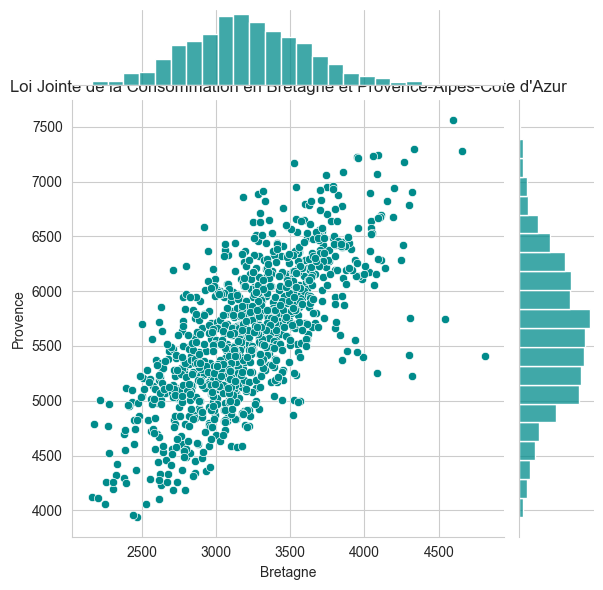

In [68]:
data_Bretagne=df[df.region == "Bretagne"].reset_index(drop=True)
data_Bretagne_Hiver= equivalentHiver(data_Bretagne)['consumption']
data_Provence= df[df.region == "Provence-Alpes-Côte d'Azur"].reset_index(drop=True)
data_Provence_Hiver= equivalentHiver(data_Provence)['consumption']
data_joint= pd.DataFrame({'Bretagne': data_Bretagne_Hiver, 'Provence': data_Provence_Hiver})
data_joint


sns.jointplot(data_joint, x=data_joint['Bretagne'], y=data_joint['Provence'], kind="scatter", color='darkcyan')
plt.title('Loi Jointe de la Consommation en Bretagne et Provence-Alpes-Côte d\'Azur')
plt.show()

2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

On voit clairement qu'une tendance se dégage et qu'une corrélation existe entre ces deux colonnes.
Donc on peut prévoir que ces données ne sont pas indépendantes

3. Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$. 

Provence  3940  3956  4058  4060  4101  4116  4118  4186  4189  4196  ...  \
Bretagne                                                              ...   
2167         0     0     0     0     0     0     1     0     0     0  ...   
2182         0     0     0     0     0     0     0     0     0     0  ...   
2206         0     0     0     0     0     1     0     0     0     0  ...   
2221         0     0     0     0     0     0     0     0     0     0  ...   
2256         0     0     0     1     0     0     0     0     0     0  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
4335         0     0     0     0     0     0     0     0     0     0  ...   
4540         0     0     0     0     0     0     0     0     0     0  ...   
4593         0     0     0     0     0     0     0     0     0     0  ...   
4655         0     0     0     0     0     0     0     0     0     0  ...   
4809         0     0     0     0     0     0     0     0     0     0  ...   

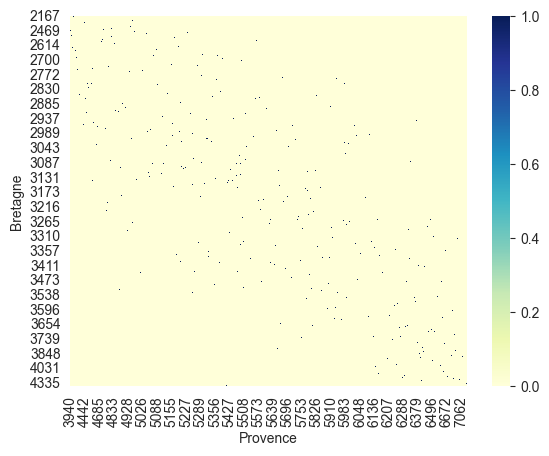

In [69]:
contingency_table= pd.crosstab(data_joint['Bretagne'],data_joint['Provence'])
sns.heatmap(contingency_table, annot=False, cmap="YlGnBu")
print(contingency_table)

4. Donnez le résultat de ce test pour $\alpha=1\%$.

In [70]:
contingence=contingency_table.values
sum_lig=contingence.sum(axis=1)
sum_col=contingence.sum(axis=0)
total=sum(sum_lig)
attendu=[]
alpha=0.01

for i in range(len(sum_lig)):
    expected_lig=[]
    for j in range(len(sum_col)):
        expected_val=sum_lig[i]*sum_col[j]/total
        expected_lig.append(expected_val)
    attendu.append(expected_lig)
chi2=0

for i in range(len(sum_lig)):
    for j in range(len(sum_col)):
        chi2+=(contingence[i][j]-attendu[i][j])**2/attendu[i][j]
ddl=(len(sum_lig)-1)*(len(sum_col)-1)
print("Q :" ,chi2)

import scipy.stats as stats
chi2seuil =stats.chi2.ppf(1-alpha, ddl)
print('chi2seuil :',chi2seuil)
if chi2seuil<chi2:
    print("Ho est rejetée")
chi2-chi2seuil


Q : 584167.2499997718
chi2seuil : 581331.9571433056
Ho est rejetée


2835.292856466258

On peut donc rejeter l'indépendance entre ses deux lois

## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

1. Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

In [71]:
data_Bretagne_Hiver= equivalentHiver(data_Bretagne)
muBH=moyenne(data_Bretagne_Hiver)
stdBH=stdDev(data_Bretagne_Hiver)
n=len(data_Bretagne_Hiver)
alpha=0.95
tBH= t.ppf(1-alpha/2,n-1)
#cela est valable seulement pour une loi normale centré réduite
intervalle=[muBH-tBH*stdBH/np.sqrt(n),muBH+tBH*stdBH/np.sqrt(n)]
print(intervalle)


[3213.358613866651, 3214.9978016119644]


2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.

In [73]:
data= df[df.region == "Bretagne"]
data= data.reset_index(drop=True)
data['date']=pd.to_datetime(data['date'])
data=data[(data['date']>=pd.to_datetime('2023-01-01')) & (data['date']<=pd.to_datetime('2023-03-21'))]
muBh=3100
print(data)
t,p_value=stats.ttest_1samp(data.consumption, muBh)
alpha=0.05
print(f"p_value={p_value}")
if p_value<alpha:
    print("Ho est rejetée")
else:
    print("Ho est acceptée")

        region       date  consumption
3652  Bretagne 2023-01-01         2306
3653  Bretagne 2023-01-02         2702
3654  Bretagne 2023-01-03         3049
3655  Bretagne 2023-01-04         2904
3656  Bretagne 2023-01-05         2833
...        ...        ...          ...
3727  Bretagne 2023-03-17         2609
3728  Bretagne 2023-03-18         2309
3729  Bretagne 2023-03-19         2206
3730  Bretagne 2023-03-20         2672
3731  Bretagne 2023-03-21         2618

[80 rows x 3 columns]
p_value=0.7591596860406199
Ho est acceptée


la pvalue est supérieur à 5% donc on accepte l'hypothèse initial sur la consommation moyenne